# Bit flipping game with DQN solver

This is the implementation of the DQN solver for the bit flipping game in [**Hindsight Experience Replay**](https://arxiv.org/abs/1707.01495).

**Rerefence**:

1. Marcin Andrychowicz, Filip Wolski, Alex Ray, Jonas Schneider, Rachel Fong, Peter Welinder, Bob McGrew, Josh Tobin, Pieter Abbeel, Wojciech Zaremba, Hindsight Experience Replay


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bitflipping import bitflipping as bf
from DQN import DQN

plt.rcParams['figure.figsize'] = [15, 20]
%matplotlib inline

## Set up the bit flipping game environment

In [2]:
init_state = np.array([0,1])
goal = np.ones((2,))
n = 4
bf_env = bf(n)

## Build up the DQN neural network

In [3]:
tf.reset_default_graph()


x = tf.placeholder(tf.float32, shape=(None, 2*n))
y = tf.placeholder(tf.float32, shape=(None, 1))


hid = [256]
agent = DQN(x, hid, n, discount=0.98, eps=1, annealing=0.8, tau = 0.95, replay_buffer_size=1e5, batch_size=128)

In [4]:
losses, success_all = agent.train_Q(x, y, epoch=5, cycles=50, episode=16, iteration=40)

Epoch 0 Cycle 0: loss is 0.0496
Epoch 0 Cycle 1: loss is 0.0389
Epoch 0 Cycle 2: loss is 0.0404
Epoch 0 Cycle 3: loss is 0.0363
Epoch 0 Cycle 4: loss is 0.0307
Epoch 0 Cycle 5: loss is 0.0467
Epoch 0 Cycle 6: loss is 0.0508
Epoch 0 Cycle 7: loss is 0.0415
Epoch 0 Cycle 8: loss is 0.0273
Epoch 0 Cycle 9: loss is 0.0497
Epoch 0 Cycle 10: loss is 0.0426
Epoch 0 Cycle 11: loss is 0.0444
Epoch 0 Cycle 12: loss is 0.0693
Epoch 0 Cycle 13: loss is 0.0184
Epoch 0 Cycle 14: loss is 0.056
Epoch 0 Cycle 15: loss is 0.0584
Epoch 0 Cycle 16: loss is 0.0435
Epoch 0 Cycle 17: loss is 0.0273
Epoch 0 Cycle 18: loss is 0.0214
Epoch 0 Cycle 19: loss is 0.0359
Epoch 0 Cycle 20: loss is 0.0437
Epoch 0 Cycle 21: loss is 0.08
Epoch 0 Cycle 22: loss is 0.0468
Epoch 0 Cycle 23: loss is 0.0484
Epoch 0 Cycle 24: loss is 0.0581
Epoch 0 Cycle 25: loss is 0.0353
Epoch 0 Cycle 26: loss is 0.104
Epoch 0 Cycle 27: loss is 0.0289
Epoch 0 Cycle 28: loss is 0.0382
Epoch 0 Cycle 29: loss is 0.0957
Epoch 0 Cycle 30: loss i

Epoch 5 Cycle 8: loss is 0.543
Epoch 5 Cycle 9: loss is 0.858
Epoch 5 Cycle 10: loss is 1.25
Epoch 5 Cycle 11: loss is 0.471
Epoch 5 Cycle 12: loss is 0.395
Epoch 5 Cycle 13: loss is 0.791
Epoch 5 Cycle 14: loss is 0.555
Epoch 5 Cycle 15: loss is 0.794
Epoch 5 Cycle 16: loss is 0.64
Epoch 5 Cycle 17: loss is 0.56
Epoch 5 Cycle 18: loss is 1.28
Epoch 5 Cycle 19: loss is 0.484
Epoch 5 Cycle 20: loss is 0.566
Epoch 5 Cycle 21: loss is 0.891
Epoch 5 Cycle 22: loss is 0.814
Epoch 5 Cycle 23: loss is 0.734
Epoch 5 Cycle 24: loss is 0.657
Epoch 5 Cycle 25: loss is 0.821
Epoch 5 Cycle 26: loss is 0.748
Epoch 5 Cycle 27: loss is 1.16
Epoch 5 Cycle 28: loss is 0.915
Epoch 5 Cycle 29: loss is 1.33
Epoch 5 Cycle 30: loss is 0.751
Epoch 5 Cycle 31: loss is 0.837
Epoch 5 Cycle 32: loss is 0.84
Epoch 5 Cycle 33: loss is 1.18
Epoch 5 Cycle 34: loss is 0.676
Epoch 5 Cycle 35: loss is 1.02
Epoch 5 Cycle 36: loss is 1.02
Epoch 5 Cycle 37: loss is 0.852
Epoch 5 Cycle 38: loss is 0.771
Epoch 5 Cycle 39: lo

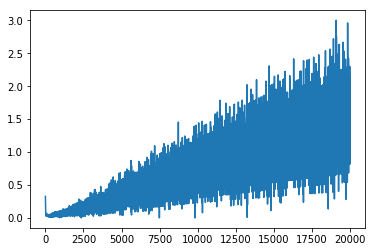

In [5]:
plt.figure()
plt.plot(losses)
plt.show()

## Test DQN

In [10]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, '/tmp/model.ckpt')
    
    success = 0
    for i in range(100):
        
        bf_env.reset()

        for i in range(n):
            X = np.concatenate((bf_env.state.reshape((1,-1)),bf_env.goal.reshape((1,-1))), axis=1)
            Q = sess.run(agent.targetModel, feed_dict={x: X})
            action = np.argmax(Q)
            bf_env.update_state(action)
            if (bf_env.reward(bf_env.state)==0):
                print('Success! state:{0}\t Goal state:{1}'.format(bf_env.state, bf_env.goal))
                success += 1
                break
            elif (i==n-1):
                print('Fail! state:{0}\t Goal state:{1}'.format(bf_env.state, bf_env.goal))
                
    print('Success rate {}%'.format(success))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Fail! state:[0 1 1 1]	 Goal state:[1 0 0 1]
Fail! state:[1 1 0 0]	 Goal state:[0 1 1 1]
Success! state:[1 1 0 1]	 Goal state:[1 1 0 1]
Fail! state:[1 1 0 0]	 Goal state:[1 1 1 0]
Fail! state:[0 0 0 1]	 Goal state:[0 1 1 0]
Fail! state:[1 0 0 0]	 Goal state:[0 1 0 0]
Fail! state:[1 0 0 0]	 Goal state:[1 1 1 1]
Fail! state:[1 0 1 1]	 Goal state:[1 0 0 1]
Fail! state:[0 1 0 1]	 Goal state:[0 0 1 0]
Success! state:[1 0 1 0]	 Goal state:[1 0 1 0]
Success! state:[1 0 1 1]	 Goal state:[1 0 1 1]
Fail! state:[1 1 1 1]	 Goal state:[1 0 1 1]
Fail! state:[0 0 0 1]	 Goal state:[1 0 1 0]
Success! state:[1 1 1 0]	 Goal state:[1 1 1 0]
Fail! state:[0 0 0 1]	 Goal state:[0 1 1 0]
Fail! state:[0 0 1 1]	 Goal state:[1 1 0 1]
Fail! state:[0 1 1 0]	 Goal state:[0 1 0 1]
Fail! state:[0 0 1 1]	 Goal state:[1 1 0 1]
Fail! state:[0 0 1 0]	 Goal state:[0 0 1 1]
Fail! state:[1 1 0 1]	 Goal state:[0 0 1 1]
Fail! state:[1 1 0 1]	 Goal state:[0 0 1 1]
Fail! 

In [7]:
a=np.array([[1,2,3,2,1,3]])

In [8]:
a.shape

(1, 6)

In [9]:
s=np.argmax(a)